# Power manifold

In [1]:
%matplotlib notebook

import sys
import numpy as np
import matplotlib
import logging
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sys.path.append("../../")
from experiments.simulators import PowerManifoldSimulator

logging.basicConfig(
    format="%(asctime)-5.5s %(name)-30.30s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.DEBUG,
)
for key in logging.Logger.manager.loggerDict:
    if "experiments" not in key and "manifold_flow" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

## Set up simulator

In [2]:
sim = PowerManifoldSimulator(
    draw_constants=False,
    filename="../data/samples/power/manifold.npz"
)


In [3]:
# max_power=5
# power_decay=3.
# weight=0.4
# base_coeff_std=1.0
# exp_suppression=0.1

# sim = PowerManifoldSimulator(
#     draw_constants=True,
#     filename="../data/samples/power/debug.npz",
#     max_power=max_power,
#     power_decay=power_decay,
#     weight=weight,
#     base_coeff_std=base_coeff_std,
#     exp_suppression=exp_suppression
# )

## Get data

In [14]:
boundary = 5.
cmin, cmax = -5., 5.
theta = 0.

res = 51

In [15]:
z_grid_each = np.linspace(-boundary, boundary, 51)
z0, z1 = np.meshgrid(z_grid_each, z_grid_each)
z_grid = np.vstack((z0.flatten(), z1.flatten())).T

f_grid = sim._fz(z_grid).flatten()
x_grid = sim._transform_z_to_x(z_grid)

logp_grid = sim._log_density_z(z_grid, parameters=theta*np.ones((51**2,1))).flatten()
delta_logp_grid = (
    sim._log_density_z(z_grid, parameters=1.*np.ones((51**2,1))).flatten()
    - sim._log_density_z(z_grid, parameters=-1.*np.ones((51**2,1))).flatten()
)


<IPython.core.display.Javascript object>


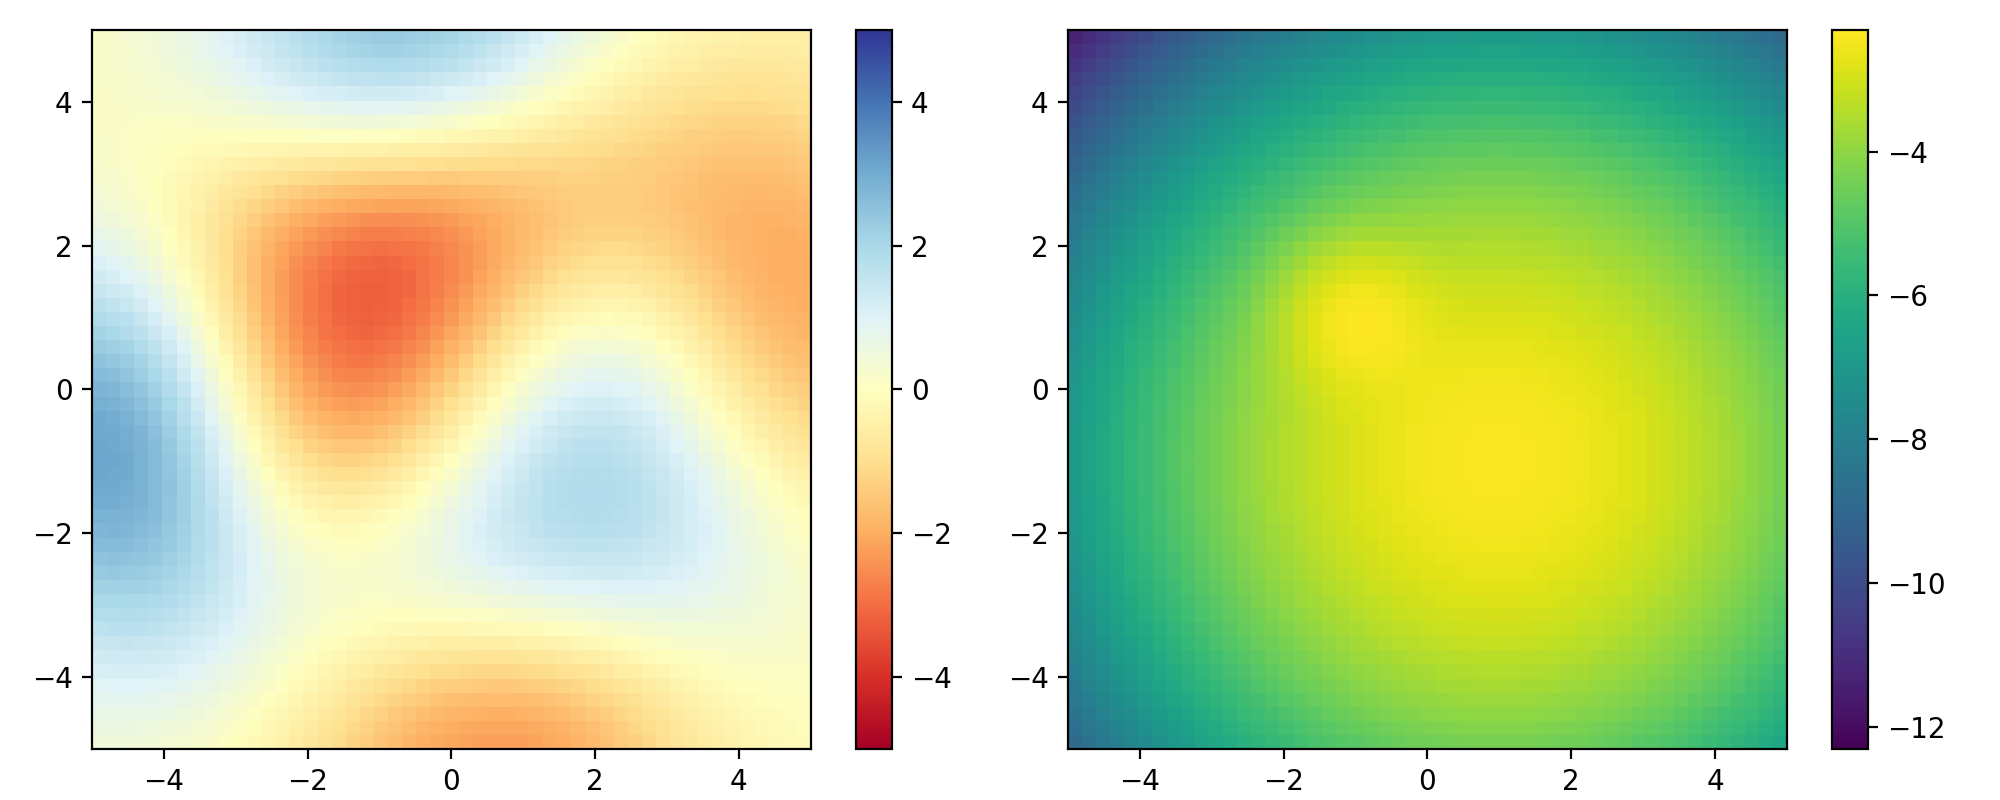

In [16]:
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(1,2, 1)
sc = ax.imshow(
    f_grid.reshape((res, res)),
    extent=(-boundary, boundary, -boundary, boundary),
    cmap="RdYlBu",
    vmin=cmin,
    vmax=cmax,
    origin="lower"
)
cbar = plt.colorbar(sc)
ax.set_xlim(-boundary, boundary)
ax.set_ylim(-boundary, boundary)

ax = fig.add_subplot(1,2, 2)
sc = ax.imshow(
    logp_grid.reshape((res, res)),
    extent=(-boundary, boundary, -boundary, boundary),
    cmap="viridis",
    vmin=np.max(logp_grid),
    vmax=np.max(logp_grid)-10.,
    origin="lower"
)
cbar = plt.colorbar(sc)
ax.set_xlim(-boundary, boundary)
ax.set_ylim(-boundary, boundary)

plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


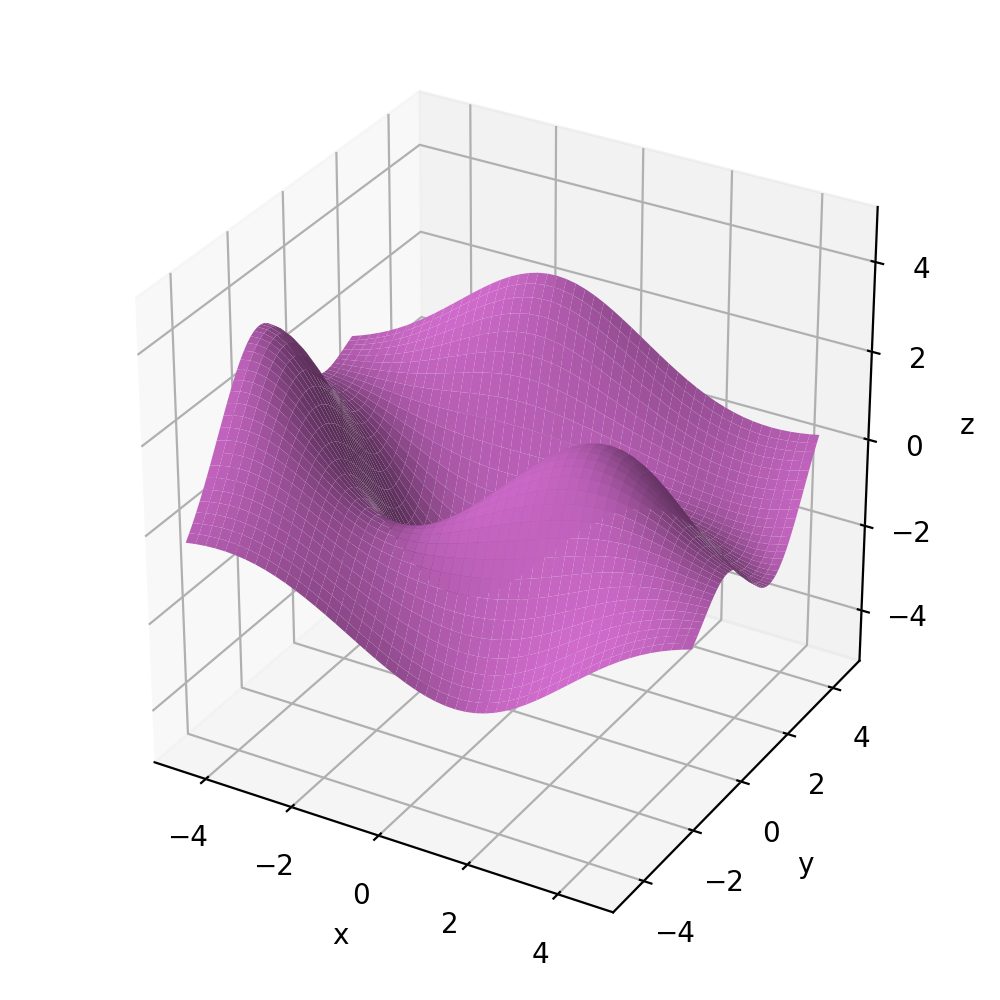

In [38]:
fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(1,1,1, projection="3d")
ax.plot_surface(
    x_grid[:,0].reshape((res, res)),
    x_grid[:,1].reshape((res, res)),
    x_grid[:,2].reshape((res, res)),
    color="orchid",
    rstride=1, cstride = 1,
    linewidth=1.
)

ax.set_xlim3d(-boundary, boundary)
ax.set_ylim3d(-boundary, boundary)
ax.set_zlim3d(-boundary, boundary)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.tight_layout()
plt.savefig("../figures/power_manifold.pdf")

In [24]:
sim._rotation

array([[ 9.73887216e-01, -2.26860567e-01, -8.83026976e-03],
       [ 2.27031938e-01,  9.73073894e-01,  3.97956792e-02],
       [-4.35565375e-04, -4.07612565e-02,  9.99168820e-01]])